# Extracción de Características

In [1]:
import numpy as np
from PIL import Image
import skimage as ski
import matplotlib.pyplot as plt
from skimage import measure, color
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

IDEAL_IMAGE = '../Data/images/all_ideal.jpg'
REAL_IMAGE = '../Data/images/all_real.jpg'

ideal_image_array = np.asarray(Image.open(IDEAL_IMAGE))
ideal_image_array_g = np.asarray(Image.open(IDEAL_IMAGE).convert('L'))

real_image_array = np.asarray(Image.open(REAL_IMAGE))
real_image_array_g = np.asarray(Image.open(REAL_IMAGE).convert('L'))

print('Ideal image dimensions: ', ideal_image_array.shape)
print('Real image dimensions: ', real_image_array.shape)

Ideal image dimensions:  (720, 960, 3)
Real image dimensions:  (244, 322, 3)


In [2]:
def binarize(image, t):
    bw = np.zeros(image.shape)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if(image[i][j] < t):
                bw[i][j] = 255
    
    return bw

## Imágenes a utilizar

### Ideal Image

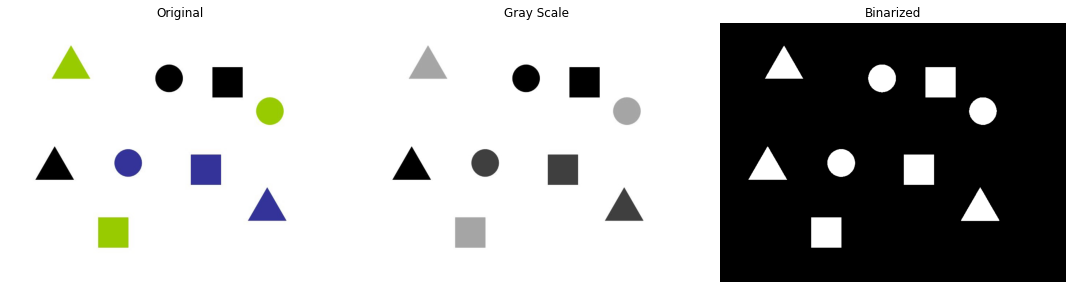

In [3]:
ideal_image_array_bw = binarize(ideal_image_array_g, 200)

fig, ax = plt.subplots(1, 3, figsize = (15, 10))
ax[0].set_title('Original')
ax[0].imshow(ideal_image_array)
ax[0].axis('off')

ax[1].set_title('Gray Scale')
ax[1].imshow(ideal_image_array_g, cmap = 'gray')
ax[1].axis('off')

ax[2].set_title('Binarized')
ax[2].imshow(ideal_image_array_bw, cmap = 'gray')
ax[2].axis('off')

plt.tight_layout()
plt.show()

### Real Image

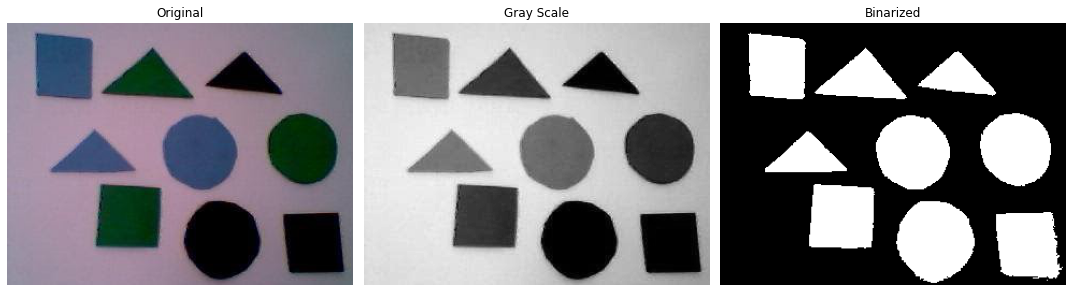

In [4]:
real_image_array_bw = binarize(real_image_array_g, 101)

fig, ax = plt.subplots(1, 3, figsize = (15, 10))
ax[0].set_title('Original')
ax[0].imshow(real_image_array)
ax[0].axis('off')

ax[1].set_title('Gray Scale')
ax[1].imshow(real_image_array_g, cmap = 'gray')
ax[1].axis('off')

ax[2].set_title('Binarized')
ax[2].imshow(real_image_array_bw, cmap = 'gray')
ax[2].axis('off')

plt.tight_layout()
plt.show()

## Extract figures from images

### Ideal image

<ipython-input-5-2c2dd0cdaf96>:2: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  plt.imshow(color.label2rgb(ideal_label_image))


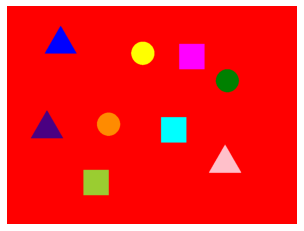

In [5]:
ideal_label_image=ski.measure.label(ideal_image_array_bw)
plt.imshow(color.label2rgb(ideal_label_image))
plt.axis('off')
plt.show()

In [6]:
ideal_regions = ski.measure.regionprops(ideal_label_image)
print('Length of regions: ', len(ideal_regions))
print('Boundary box of first region: ', ideal_regions[0]['bbox'])

Length of regions:  9
Boundary box of first region:  (66, 125, 157, 231)


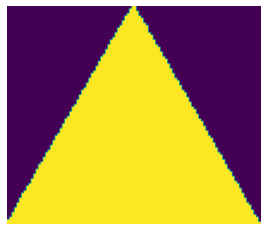

In [7]:
plt.imshow(ideal_image_array_bw[66:157, 125:231])
plt.axis('off')
plt.show()

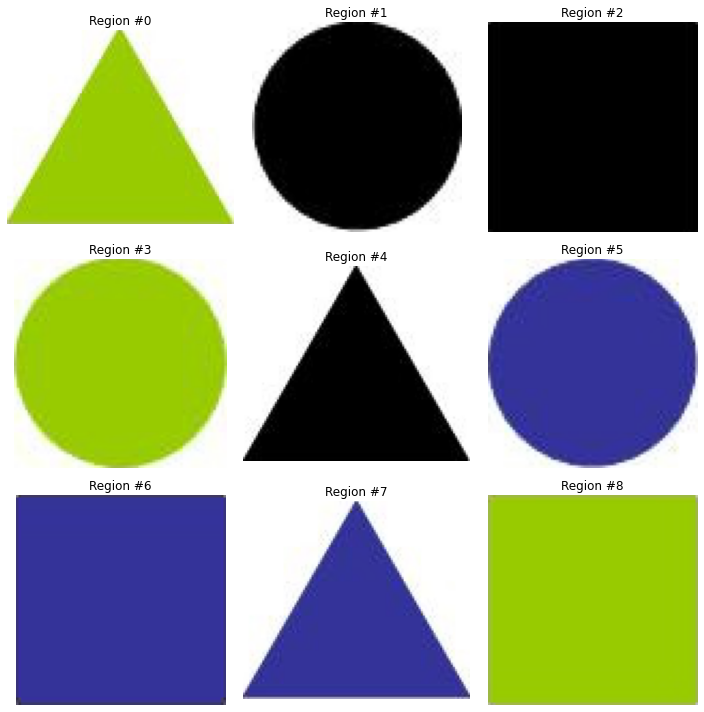

In [8]:
fig, ax = plt.subplots(3, 3, figsize = (10, 10))

reg = 0
for i in range(3):
    for j in range(3):
        ax[i][j].set_title('Region #' + str(reg))
        bounds = ideal_regions[reg]['bbox']
        ax[i][j].imshow(ideal_image_array[bounds[0]:bounds[2], bounds[1]:bounds[3]])
        ax[i][j].axis('off')
        
        reg = reg + 1
    
plt.tight_layout()
plt.show()

### Real image

<ipython-input-9-10ed89132474>:2: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  plt.imshow(color.label2rgb(real_label_image))


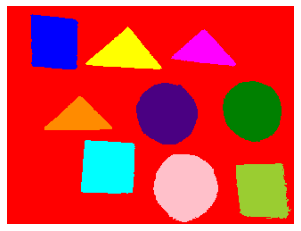

In [9]:
real_label_image=ski.measure.label(real_image_array_bw)
plt.imshow(color.label2rgb(real_label_image))
plt.axis('off')
plt.show()

In [10]:
real_regions = ski.measure.regionprops(real_label_image)
print(len(real_regions))
print('Boundary box of first region: ', real_regions[0]['bbox'])

10
Boundary box of first region:  (9, 26, 71, 80)


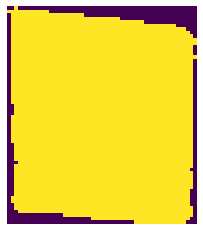

In [11]:
plt.imshow(real_image_array_bw[9:71, 26:80])
plt.axis('off')
plt.show()

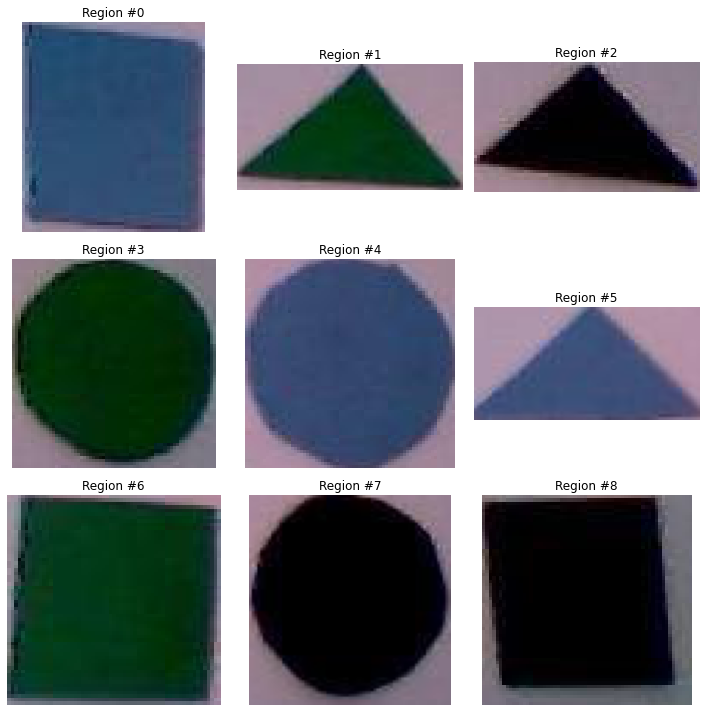

In [12]:
fig, ax = plt.subplots(3, 3, figsize = (10, 10))

reg = 0
for i in range(3):
    for j in range(3):
        ax[i][j].set_title('Region #' + str(reg))
        bounds = real_regions[reg]['bbox']
        ax[i][j].imshow(real_image_array[bounds[0]:bounds[2], bounds[1]:bounds[3]])
        ax[i][j].axis('off')
        
        reg = reg + 1
    
plt.tight_layout()
plt.show()

## Creating datasets

The ideal image will be the training dataset and the real image will be the test dataset  

green = [1, 0, 0]  
black = [0, 1, 0]  
blue = [0, 1, 1]

### Color dataset

In [13]:
X_train_color = []

for i in range(len(ideal_regions)):
    bounds = ideal_regions[i]['bbox']
    image = ideal_image_array[bounds[0]:bounds[2], bounds[1]:bounds[3]]
    
    color = image[image.shape[0]//2, image.shape[1]//2]
    
    X_train_color.append(color)

X_train_color = np.asarray(X_train_color)
X_train_color

array([[152, 203,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [152, 203,   0],
       [  0,   0,   0],
       [ 52,  51, 153],
       [ 52,  51, 153],
       [ 52,  51, 153],
       [152, 203,   0]], dtype=uint8)

In [14]:
y_train_color = np.asarray([
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 0],
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [0, 0, 1],
    [0, 0, 1],
    [1, 0, 0]
])

In [15]:
X_test_color = []

for i in range(len(real_regions) - 1):
    bounds = real_regions[i]['bbox']
    image = real_image_array[bounds[0]:bounds[2], bounds[1]:bounds[3]]
    
    color = image[image.shape[0]//2, image.shape[1]//2]
    
    X_test_color.append(color)

X_test_color = np.asarray(X_test_color)
X_test_color

array([[ 43,  77, 114],
       [  0,  58,  14],
       [  2,   1,   0],
       [  0,  41,   5],
       [ 51,  70, 110],
       [ 63,  76, 120],
       [  1,  57,  18],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=uint8)

In [16]:
y_test_color = np.asarray([
    [0, 0, 1],
    [1, 0, 0],
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 1],
    [0, 0, 1],
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 0]
])

### Shape dataset

square = [1, 0, 0]  
triangle = [0, 1, 0]  
circle = [0, 0, 1]

In [17]:
X_train_shape = []

for i in range(len(ideal_regions)):
    X_train_shape.append(ideal_regions[i].moments_hu)

X_train_shape = np.asarray(X_train_shape)
X_train_shape

array([[ 1.92190194e-01,  6.20976658e-08,  4.51753496e-03,
         1.08377762e-08, -2.60228251e-14, -6.92285507e-13,
         7.12287190e-14],
       [ 1.59159309e-01,  3.90273736e-08,  3.49739648e-08,
         3.85955814e-12,  8.56228767e-22, -7.20029963e-16,
         1.13031864e-21],
       [ 1.66643046e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.59165694e-01,  8.79371327e-09,  3.34858791e-08,
         2.75667575e-12, -3.74546655e-22,  1.63510207e-16,
         7.49133105e-22],
       [ 1.92303810e-01,  2.44781545e-07,  4.53762050e-03,
         1.74543175e-08, -6.45664894e-15, -2.03106884e-12,
         1.55200421e-13],
       [ 1.59159766e-01,  1.64670041e-08,  6.75913984e-09,
         4.10949119e-13,  1.63032283e-24,  7.78951661e-18,
        -2.15970234e-23],
       [ 1.66643046e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.0000000

In [18]:
y_train_shape = np.asarray([
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0],
    [0, 1, 0],
    [1, 0, 0]
])

In [19]:
X_test_shape = []

for i in range(len(real_regions) - 1):
    X_test_shape.append(real_regions[i].moments_hu)

X_test_shape = np.asarray(X_test_shape)
X_test_shape

array([[ 1.67887631e-01,  5.91439780e-04,  7.01998826e-06,
         2.63826800e-07,  2.05145364e-13,  3.60287008e-10,
        -2.94664744e-13],
       [ 2.18298355e-01,  1.10015564e-02,  5.14222475e-03,
         1.91939107e-04, -1.55062081e-07, -1.73665944e-05,
        -1.10982987e-07],
       [ 2.19029469e-01,  1.26326466e-02,  4.59982443e-03,
         2.11828758e-04, -1.04143535e-07, -1.50726832e-05,
         1.81316632e-07],
       [ 1.59599489e-01,  8.71524001e-05,  1.03384514e-05,
         7.14991366e-09, -5.97104542e-16, -2.92071804e-11,
         1.84994615e-15],
       [ 1.59418424e-01,  4.37966362e-05,  1.90916978e-06,
         6.88424237e-10, -2.03320272e-17, -3.92597648e-12,
         1.44741507e-17],
       [ 2.24119902e-01,  1.41067352e-02,  5.06694465e-03,
         2.37256638e-04, -1.44430481e-07, -1.97158026e-05,
        -2.16357646e-07],
       [ 1.66028706e-01,  1.34100941e-05,  1.02327507e-05,
         2.37449277e-07, -3.66983902e-14,  5.09471302e-10,
         3.6830463

square = [1, 0, 0]  
triangle = [0, 1, 0]  
circle = [0, 0, 1]

In [20]:
y_test_shape = np.asarray([
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [0, 0, 1],
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 1],
    [1, 0, 0]
])

## Creating the classifiers

In [21]:
clf_color = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 2))
clf_color.fit(X_train_color, y_train_color)
color_predictions = clf_color.predict(X_test_color)

color_predictions

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]])

In [22]:
accuracy_score(color_predictions, y_test_color)

0.6666666666666666

In [23]:
clf_shape = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 2))
clf_shape.fit(X_train_shape, y_train_shape)
shape_predictions = clf_shape.predict(X_test_shape)

shape_predictions

/home/fraga/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


array([[1, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 1],
       [0, 0, 1],
       [1, 1, 0]])

In [24]:
accuracy_score(shape_predictions, y_test_shape)

0.6666666666666666